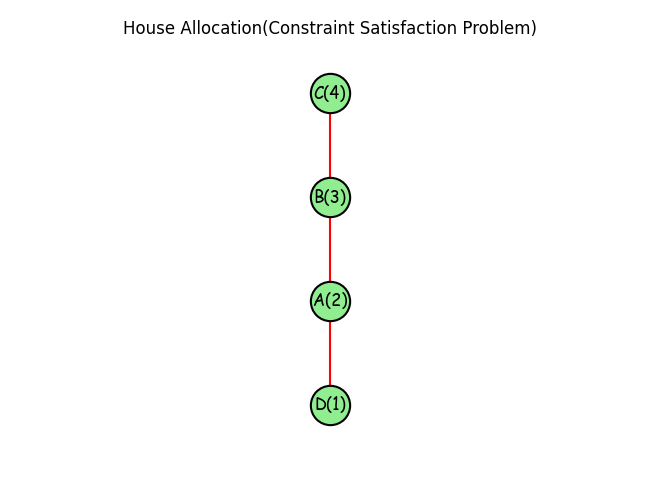

House: A  Location: 2
House: B  Location: 3
House: C  Location: 4
House: D  Location: 1


<Figure size 640x480 with 0 Axes>

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
def check(assign, loc):
    #constraints given in the question
    #change it accordinly

    a = assign['A']
    b = assign['B']
    c = assign['C']
    d = assign['D']
    
    #1. C lives in a house higher than D
    if c != -1 and d != -1 and c < d:return False

    #2. D lives next to A in Lower number House
    if d != -1 and a != -1 and (a - d) != 1:return False

    #3. There is at least one house between D and B    
    if d != -1 and b != -1 and abs(d - b) == 1:return False

    #4. C doesn't live in house number 3
    if c != -1 and c == 3:return False

    #5. B doesn't live in house number 1
    if b != -1 and b == 1:return False
        
    if loc in assign.values():
        return False
    return True
def backtrack(houses, locs):
    assign = {house : -1 for house in houses}    
    return rec_backtrack(assign, locs)
def rec_backtrack(assign, locs):
    if check(assign, -1):
        return assign
    choices = [x for x in assign if assign[x] == -1]
    house = choices[0] if choices else None
    for loc in locs:
        if check(assign, loc):
            assign[house] = loc
            res = rec_backtrack(assign, locs)
            if res:
                return res
            assign[house] = -1
    return None
def display_house(result):
    g = nx.Graph()
    nodes = list(result.keys())
    nodes.sort(key = lambda x : result[x])
    nodes = [f"{node}({result[node]})" for node in nodes]
    for u, v in zip(nodes, nodes[1:]):
        g.add_edge(u, v)
    pos = {node : (0, i) for i, node in enumerate(nodes)}
    nx.draw(g, pos, with_labels = True,
            width = 1.5, edge_color = 'red',
            node_size = 800, node_color = 'lightgreen',
            font_size = 12, font_family = 'cursive',
            edgecolors = 'black', linewidths = 1.5,
            margins = 0.2, clip_on = False)
    plt.suptitle("House Allocation(Constraint Satisfaction Problem)")
    plt.show()
    plt.clf()

def main():
    #Info: "There are 4 family namely A, B, C, D there are 4 houses namely 1,2,3,4"
    #1. C lives in a house higher than D
    #2. D lives next to A in Lower number House
    #3. There is at least one house between D and B
    #4. C doesn't live in house number 3
    #5. B doesn't live in house number 1
    locs = [1,2,3,4]
    houses = ['A','B','C','D']
    sol = backtrack(houses, locs)
    if sol:
        display_house(sol)
        for node in sol:
            print("House:",node," Location:",sol[node])
    else:
        print("No Solution Exists")

    #Sample Input/Output
    #House: A  Location: 2
    #House: B  Location: 3
    #House: C  Location: 4
    #House: D  Location: 1
main()